<a href="https://colab.research.google.com/github/awol380/Machine-Learning-2410-Assignment-Group1/blob/main/Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Annual Fuel Consumption of Motor Vehicle
## Phase 1: Data Pre-processing, Exploration and Visualisation <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

- [Introduction](#intro)
  - [Dataset Source](#source)
  - [Dataset Details](#details)
  - [Dataset Features](#features)
  - [Target Feature](#target)
- [Goals & Objectives](#go)
- [Data Cleaning & Preprocessing](#cleaning)
- [Data Exploration & Visualisation](#viz)
- [Summary & Conclusions](#sum)
- [References](#ref)

## Introduction <a id='intro'></a>
### Dataset Source:<a id='source'></a>

The source of the dataset on Vehicle Fuel Economy was Kaggle (Maharaj, 2024).  The vehicles included in the dataset include models from 1984 to 2017.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)



In [2]:
#host the dataset on github with public view for ease of reading
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

### Dataset Details: <a id='details'></a>
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. The dataset lists one car per record which are independent of each other.

A random sample of 10 observations from the selected dataset has been printed.

In [3]:
data.shape

(38113, 81)

In [4]:
data.sample(n = 10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,engine_cylinders,engine_displacement,turbocharger,supercharger,fuel_type,fuel_type_1,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,unrounded_highway_mpg_ft1,highway_mpg_ft2,unrounded_highway_mpg_ft2,highway_gasoline_consumption_cd,highway_electricity_consumption,highway_utility_factor,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,unadjusted_city_mpg_ft2,unadjusted_highway_mpg_ft2,combined_mpg_ft1,unrounded_combined_mpg_ft1,combined_mpg_ft2,unrounded_combined_mpg_ft2,combined_electricity_consumption,combined_gasoline_consumption_cd,combined_utility_factor,annual_fuel_cost_ft1,annual_fuel_cost_ft2,gas_guzzler_tax,save_or_spend_5_year,annual_consumption_in_barrels_ft1,annual_consumption_in_barrels_ft2,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,tailpipe_co2_in_grams_mile_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,x2d_passenger_volume,x2d_luggage_volume,x4d_passenger_volume,x4d_luggage_volume,hatchback_passenger_volume,hatchback_luggage_volume,start_stop_technology,alternative_fuel_technology,electric_motor,manufacturer_code,gasoline_electricity_blended_cd,vehicle_charger,alternate_charger,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
31541,32283,2012,Lotus,Evora,Minicompact Cars,Rear-Wheel Drive,Manual 6-Speed,NaN,3,NaN,6.0,3.5,NaN,NaN,Premium,Premium Gasoline,NaN,18,17.9744,0,0.0,0.0,0.0,0.0,26,26.4839,0,0.0,0.0,0.0,0.0,21.5000,34.7000,0.0,0.0,21,21.0126,0,0.0,0.0,0.0,0.0,2000,0,NaN,-3250,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,48,2,48,2,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
27411,24456,2008,Volkswagen,Passat Wagon,Midsize Station Wagons,Front-Wheel Drive,Manual 6-Speed,NaN,0,NaN,4.0,2.0,True,NaN,Premium,Premium Gasoline,NaN,20,0.0000,0,0.0,0.0,0.0,0.0,29,0.0000,0,0.0,0.0,0.0,0.0,25.7946,40.8107,0.0,0.0,24,0.0000,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,13.733750,0.0,-1,370.291667,-1,0.0,-1,-1,-1,N,0,0,96,36,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
8529,7271,1990,Chevrolet,G10/20 Sport Van 2WD,Vans,Rear-Wheel Drive,Automatic 4-Speed,CLKUP,4837,(FFS),6.0,4.3,NaN,NaN,Regular,Regular Gasoline,NaN,14,0.0000,0,0.0,0.0,0.0,0.0,18,0.0000,0,0.0,0.0,0.0,0.0,17.0000,25.0000,0.0,0.0,16,0.0000,0,0.0,0.0,0.0,0.0,2200,0,NaN,-4250,20.600625,0.0,-1,555.437500,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
31425,31790,2012,Jaguar,XJ,Large Cars,Rear-Wheel Drive,Automatic (S6),NaN,7,SIDI,8.0,5.0,NaN,NaN,Premium,Premium Gasoline,NaN,16,16.0191,0,0.0,0.0,0.0,0.0,23,23.3279,0,0.0,0.0,0.0,0.0,19.8870,32.6266,0.0,0.0,19,18.6483,0,0.0,0.0,0.0,0.0,2250,0,NaN,-4500,17.347895,0.0,-1,467.736842,-1,0.0,-1,-1,-1,N,0,0,102,18,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
26194,23936,2007,Toyota,Tundra 2WD,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic (S6),CLKUP,0,NaN,8.0,5.7,NaN,NaN,Regular,Regular Gasoline,NaN,14,0.0000,0,0.0,0.0,0.0,0.0,18,0.0000,0,0.0,0.0,0.0,0.0,17.2971,25.4744,0.0,0.0,16,0.0000,0,0.0,0.0,0.0,0.0,2200,0,NaN,-4250,20.600625,0.0,-1,555.437500,-1,0.0,-1,-1,-1,Y,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3521,227,1985,Subaru,Hatchback,Subcompact Cars,Front-Wheel Drive,Manual 5-Speed,NaN,66020,(FFS),4.0,1.8,NaN,NaN,Regular,Regular Gasoline,NaN,23,0.0000,0,0.0,0.0,0.0,0.0,29,0.0000,0,0.0,0.0,0.0,0.0,29.0000,40.0000,0.0,0.0,25,0.0000,0,0.0,0.0,0.0,0.0,1400,0,NaN,-250,13.184400,0.0,-1,355.480000,-1,0.0,-1,-1,-1,N,0,0,0,0,78,12,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
13844,11620,1995,BMW,325i Co

### Dataset Features: <a id='features'></a>

#### The features of the dataset are described in the table below.

In [5]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['vehicle_id','Integer','NA','Unique number given to each row from which we \ncan access our data'],
         ['year','Integer','Date','When car was manufactured'],
         ['make','Object','NA','Manufacturer or brand the car'],
         ['model','Object','NA','The specific model name or number of the vehicle'],
         ['drive','Object','NA','Drive type of the vehicle.\n 4WD - Four Wheel drive\n 2WD - Two wheel drive\n FWD -  Front wheel drive\n RWD - Rear wheel drive \n AWD - All Wheel drive'],
         ['transmission','Object','NA','Type of transmission installed in the car.'],
         ['engine_cylinders','float','NA','Number of cylinders in the engine of the car'],
         ['engine_displacement','float','cc or L','Volume of engines combustion chambers, it is typically \nmeasured in litres(L) or cc(cubic centimeters)'],
         ['fuel_type','Object','NA','Type of fuel used by car'],
         ['fuel_type_1','Object','NA','Type of fuel used by car'],
         ['city_mpg_ft1','Integer','miles/gallon','City Fuel consumption of the car'],
         ['highway_mpg_ft1','Integer','miles/gallon','Highway Fuel consumption of the car'],
         ['highway_electricity_consumption','float','kWh','Electricity consumed by car when driven on highway'],
         ['combined_mpg_ft1','Integer','miles/gallon','Combined Fuel consumption of the car'],
         ['combined_electricity_consumption','float','kWh','Electricity consumed by car when driven on both highway \nand city'],
         ['annual_fuel_cost_ft1','Integer','USD','Yearly fuel cost of the car'],
         ['annual_consumption_in_barrels_ft1','float','NA','Number of fuel barrels consumed by car in a year'],
         ['tailpipe_co2_in_grams_mile_ft1','float','grams','Emission of Carbon Dioxide in grams'],
        ['start_stop_technology','float','NA','Indicates whether vehicle is equipped with start stop \ntechnology. It automatically shuts off engine when car \nstops to save fuel.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═════════════╤══════════════╤══════════════════════════════════════════════════════════╕
│ Name                              │ Data Type   │ Units        │ Description                                              │
╞═══════════════════════════════════╪═════════════╪══════════════╪══════════════════════════════════════════════════════════╡
│ vehicle_id                        │ Integer     │ NA           │ Unique number given to each row from which we            │
│                                   │             │              │ can access our data                                      │
├───────────────────────────────────┼─────────────┼──────────────┼──────────────────────────────────────────────────────────┤
│ year                              │ Integer     │ Date         │ When car was manufactured                                │
├───────────────────────────────────┼─────────────┼──────────────┼────────────────────────────────────────────────────

### Target feature <a id='target'></a>
For this project we chose 'annual_consumption_in_barrels_ft1' as our target feature. This target feature is a numeric feature, as it measures the annual fuel consumed by vehicle of specific make and model in barrels. This target feature can get reveal more insights regarding the fuel efficiencies of vehicles and their impact on environment. In fuel efficiency comparison, if the vehicle is consuming less fuel then it will have lower annual fuel consumption. This may attract more consumers who are interested in owning a fuel efficient car.
We can also predict the environmental impact by checking vehicle with higher values in annual fuel consumption in barrels. These vehicles will have greater environmental impact. Overall, 'annual_consumption_in_barrels_ft1' can provide some meaningful insights which can help consumers choose the right vehicle depending on their needs and preferences.

## Goals & Objectives <a id='go'></a>

The goal for the first phase of this project is to prepare and understand the dataset. This is critical to being able to build a predictive model in the second phase.

Preparing the dataset is completed by making sure it has been appropriately pre-processed including dropping unnecessary or redudant features, constant or empty features, and tidying up the values where there is white space or different naming conventions. Numeric features should also be pre-processed to ensure no missing values. All remaining features should be relevant to the ultimate goal of predicting annual fuel consumption of a vehicle.

Understanding the dataset and it's features is enabled by visualisation of the features in a variety of plots and summary tables. Relationships can be elucidated by bringing together more than 1 variable in a single visualisation. The objective of creating data visualisations is to understand how features may influence the annual fuel consumption of a vehicle.





## Data Cleaning & Preprocessing <a id='cleaning'></a>


### Isolating the features of interest

In [6]:
data.columns.to_list()

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'supercharger',
 'fuel_type',
 'fuel_type_1',
 'fuel_type_2',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'annual

In [7]:
#dropping columns from the original dataset
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [8]:
data.shape

(38113, 20)

In [9]:
data = data.set_index('vehicle_id')

In [10]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [11]:
data = data.drop(['start_stop_technology'], axis=1)

In [12]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [13]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [14]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows

### Pre-processing of Categorical Features

In [15]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36209,36209,36209,36209,36209,36209,36209
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3657,199,5197,13107,10585,23769,25034


In [16]:
categorical_features= list(data.columns[data.dtypes == object])

In [17]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [18]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [19]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

class
Compact Cars                    5197
Pickup Trucks                   4429
Subcompact Cars                 4397
Sport Utility Vehicle           4296
Midsize Cars                    4115
Special Purpose Vehicle         2253
Two Seaters                     1790
Large Cars                      1778
Small Station Wagons            1373
Minicompact Cars                1222
Small Pickup Trucks             1147
Vans                            1121
Small Sport Utility Vehicle      922
Vans, Passenger Type             685
Midsize-Large Station Wagons     633
Vans, Cargo Type                 432
Midsize Station Wagons           419
Name: count, dtype: int64

In [20]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

transmission
Automatic 4-Speed                   10585
Manual 5-Speed                       7799
Automatic (S6)                       2680
Automatic 3-Speed                    2597
Manual 6-Speed                       2442
Automatic 5-Speed                    2178
Automatic 6-Speed                    1447
Manual 4-Speed                       1306
Automatic (S8)                        977
Automatic (S5)                        825
Automatic (variable gear ratios)      696
Automatic 7-Speed                     673
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        229
Auto(AM7)                             161
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         74
Manual 7-Speed       

In [21]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

transmission
Auto      24511
Manual    11698
Name: count, dtype: int64

In [22]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')
data['gears'].value_counts() #to show the range of gears

gears
4     12120
5     10805
6      6585
3      2671
8      1237
7      1016
9       134
10        8
1         5
Name: count, dtype: int64

In [23]:
from pandas.api.types import CategoricalDtype
cats = CategoricalDtype(categories=["1", "2", "3","4","5","6","7","8","9","10"], ordered=True)
data['gears'] = data['gears'].astype(cats)

In [24]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

fuel_type
Regular                        23769
Premium                        10049
Gasoline or E85                 1215
Diesel                           824
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: count, dtype: int64

In [25]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,824,0,0,0,0
Gasoline or E85,0,0,0,0,1215
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10049,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [26]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

### Pre-processing of Numeric features

In [27]:
data.describe(include=np.number).round(2) #summarise numeric features

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00
mean,2000.84,5.76,3.34,17.66,23.83,0.08,19.92,0.08,1981.90,17.60,475.03
std,10.16,1.76,1.36,4.77,5.79,1.90,5.08,1.88,528.17,4.46,118.79
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1992.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.70,395.00
50%,2002.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,23.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


In [28]:
#Here we are doing binning for or data and converting some numeric features to represent different levels.
#First we will define the bin edges
displacement_bins = [0,2,3, float('inf')]
engine_displacement_binned = pd.cut(data['engine_displacement'], bins=displacement_bins, labels=['<2','2-3','>3'])#In <2 2 is not included
print(engine_displacement_binned)

vehicle_id
27550    2-3
27549     >3
27593     >3
28455     >3
27591    2-3
        ... 
37564     <2
37547     <2
37548     <2
37703     <2
37687     <2
Name: engine_displacement, Length: 36209, dtype: category
Categories (3, object): ['<2' < '2-3' < '>3']


In [29]:
#Check for any missing values
data['engine_displacement'].isna().sum()
data['drive'].isna().sum()

0

In [30]:
#Check for the number of same values in drive column
drive_count = data['drive'].value_counts()
print(drive_count)

drive
Front-Wheel Drive             13107
Rear-Wheel Drive              12811
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2093
4-Wheel Drive                  1097
2-Wheel Drive                   423
Part-time 4-Wheel Drive         175
Name: count, dtype: int64


In [31]:
data['drive'] = data['drive'].str.replace('Front-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Rear-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('4-Wheel or All-Wheel Drive','4|All Wheel ')
data['drive'] = data['drive'].str.replace('All-Wheel Drive','All Wheel')
data['drive'] = data['drive'].str.replace('4-Wheel Drive','4')
data['drive'] = data['drive'].str.replace('2-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Part-time 4','4')
print(data['drive'].value_counts())

drive
2               26341
4|All Wheel      6503
All Wheel        2093
4                1272
Name: count, dtype: int64


In [32]:
#Getting mean of city mileage and highway mileage
city_mean = data.groupby('make')['city_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(city_mean)
print(city_mean)

highway_mean = data.groupby('make')['highway_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(highway_mean)
print(highway_mean)

make
AM General                     15.000000
ASC Incorporated               14.000000
Acura                          18.897351
Alfa Romeo                     17.533333
American Motors Corporation    16.045455
                                 ...    
Volkswagen                     20.845155
Volvo                          17.987465
Wallace Environmental          12.437500
Yugo                           23.000000
smart                          33.090909
Name: city_mpg_ft1, Length: 127, dtype: float64
make
AM General                     15.000000
ASC Incorporated               21.000000
Acura                          25.874172
Alfa Romeo                     24.488889
American Motors Corporation    20.181818
                                 ...    
Volkswagen                     28.387612
Volvo                          25.043175
Wallace Environmental          16.000000
Yugo                           28.250000
smart                          39.090909
Name: highway_mpg_ft1, Length: 127, dtyp

In [33]:
#Log transformation
data['citympg_log'] = np.log(data['city_mpg_ft1'])
data['highwaympg_log'] = np.log(data['highway_mpg_ft1'])

In [34]:
data['decade'] = ((data['year']//10).round().astype(int) * 10).astype(str)+'s'
data

,year,make,model,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1,gears,make_encoded,citympg_log,highwaympg_log,decade
vehicle_id,,,,,,,,,,,,,,,,,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle,2,Auto,4.0,2.5,Regular Gasoline,18,17,0.0,17,0.0,2050,19.388824,522.764706,3,15.000000,2.890372,2.833213,1980s
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle,2,Auto,6.0,4.2,Regular Gasoline,13,13,0.0,13,0.0,2700,25.354615,683.615385,3,15.000000,2.564949,2.564949,1980s
27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Auto,6.0,4.2,Regular Gasoline,15,20,0.0,17,0.0,2050,19.388824,522.764706,3,20.181818,2.708050,2.995732,1980s
28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Auto,6.0,4.2,Regular Gasoline,15,19,0.0,17,0.0,2050,19.388824,522.764706,3,20.181818,2.708050,2.944439,1980s
27591,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4|All Wheel,Manual,4.0,2.5,Regular Gasoline,19,22,0.0,20,0.0,1750,16.480500,444.350000,4,20.181818,2.944439,3.091042,1980s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle,2,Auto,4.0,2.0,Regular Gasoline,23,30,0.0,26,0.0,1350,12.677308,348.000000,8,25.043175,3.135494,3.401197,2010s
37547,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All Wheel,Auto,4.0,2.0,Premium Gasoline,20,25,0.0,22,0.0,1900,14.982273,399.000000,8,25.043175,2.995732,3.218876,2010s
37548,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All Wheel,Auto,4.0,2.0,Premium Gasoline,22,25,0.0,23,0.0,1850,14.330870,384.000000,8,25.043175,3.091042,3.218876,2010s


## Data Exploration & Visualisation <a id='viz'></a>

### Understanding and exploring the observations within the dataset
Looking at 1 variable plots to understand how the dataset is constructed

<Figure size 1000x600 with 0 Axes>

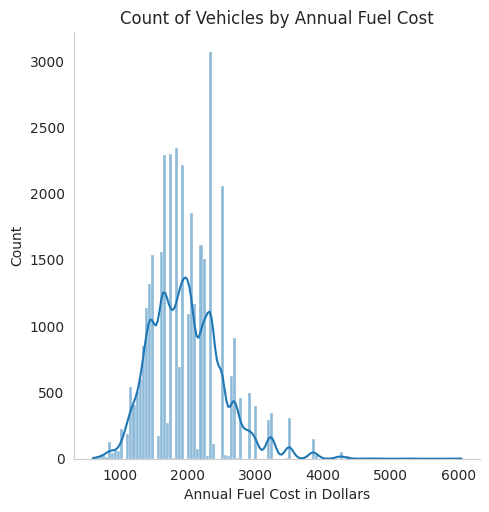

In [35]:
#Visualisation 1: 1 Variable Plot - Count of Annual Fuel Cost

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.displot(data, x="annual_fuel_cost_ft1", kde=True)
plt.xlabel('Annual Fuel Cost in Dollars')
plt.title("Count of Vehicles by Annual Fuel Cost")
plt.show()

In [36]:
data['annual_fuel_cost_ft1'].value_counts().head(5)

annual_fuel_cost_ft1
2350    3063
1850    2344
1750    2299
1650    2292
1950    2212
Name: count, dtype: int64

The first visualisation shows the spread of annual fuel cost by vehicle. This chart also plots the density function over the top, and you can see that there is a range of annual fuel costs associated with the vehicles included in the dataset. The top 5 annual fuel costs have been printed out, and the most frequent is $2350. Given the range of costs associated with running a vehicle, and the variability within this feature, understanding the drivers of this cost could be helpful to building a predictive model for propsective car buyers.

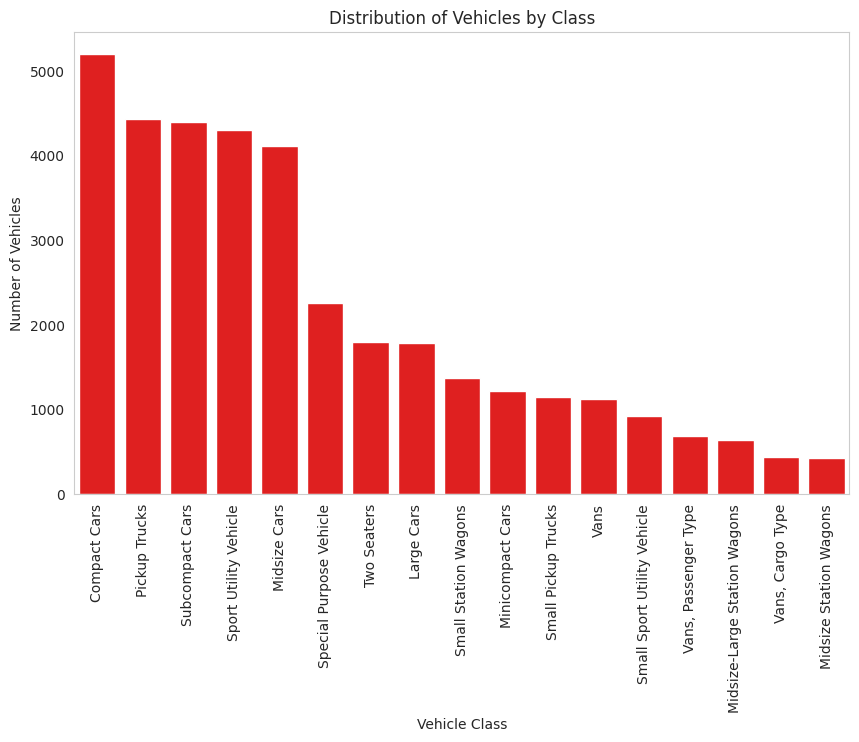

In [37]:
#visualisation 2: 1 Variable Plot - Creating bar chart to show proportion of vehicles by class
plt.figure(figsize=(10, 6))
vehicle_classes = data['class'].value_counts()
sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, color='red')
plt.xticks(rotation=90)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Distribution of Vehicles by Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.show()

This visualisation plots a count of the vehicles classes from most to least frequent in the dataset. Compact cars are the most common vehicle class in the dataset. Subcompact, Pick-Up Trucks, Sport Utility Vehicles (or SUVs), and Midsize cars represent similar proportions of the dataset. Vehicle class is closely related to the purpose of the vehicle (transportation of people, goods, sports cars such as two seaters). Based on this chart, it is observed there are several leading classes of vehicles with different purposes.

<Figure size 1000x600 with 0 Axes>

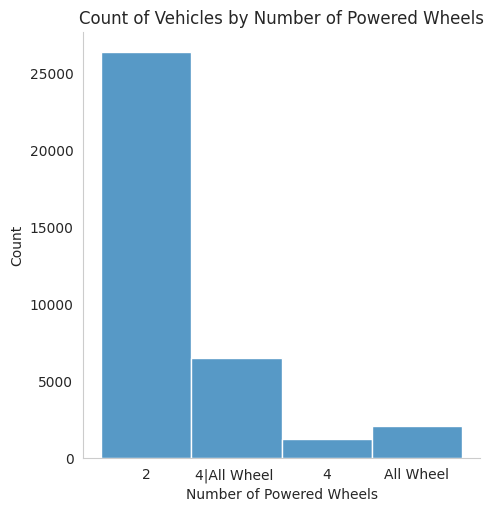

In [38]:
#Visualisation 3: 1 Variable Plot - Count of Vehicles by Number of Powered Wheels
plt.figure(figsize=(10,6))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.displot(data, x="drive")
plt.xlabel('Number of Powered Wheels')
plt.title("Count of Vehicles by Number of Powered Wheels")
plt.show()

This visualisation shows the count of vehicles by number of powered wheels (referred to as drive type in the dataset). Vehicles may transfer power to all wheels, 4 wheels, or just 2 wheels. An all wheel drive will generally always have every wheel engaged, whereas 4 wheel drive vehicles may vary between engaging 2 or 4 wheels but have the ability to drive using all wheels (Royal Automotive Club of Victoria, 2024). Majority of the vehicles in the dataset are 2 wheel drive type.

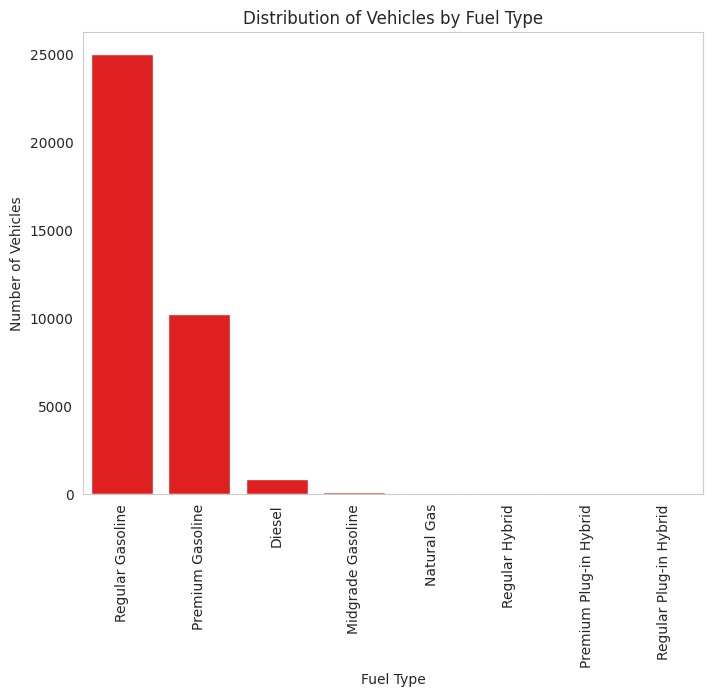

In [39]:
#visualisation 4: 1 Variable Plot - Creating bar chart to show proportions of fuel types
plt.figure(figsize=(8, 6))
fuel_type = data['fuel_type_1'].value_counts()
sns.barplot(x=fuel_type.index, y=fuel_type.values, color='red')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [40]:
fuel_type

fuel_type_1
Regular Gasoline          25012
Premium Gasoline          10196
Diesel                      824
Midgrade Gasoline            77
Natural Gas                  60
Regular Hybrid               20
Premium Plug-in Hybrid       18
Regular Plug-in Hybrid        2
Name: count, dtype: int64

Vehicles included in the dataset may be fueled by a variety of fuels. As the dataset includes vehicles as far back as the 1984, there has been an introduction of a variety of fuel types including non-combustion such as electric, as well as hybrid options. With regards to combustion engines, there are a variety of fuels that can be used including different qualities, or physical states such as natural gas. Despite all the options, regular gasoline (or petrol) remains the most common fuel type for vehicles included in the dataset whihc included only 40 vehicles with hybrid fuel sources such as gasoline and a battery.

### Understanding and exploring relationships between features
By plotting more than 1 variable, relationships between features within the dataset can be understood, including those features relevant or impactful to the target feature and ability to reliably predict using modelling.

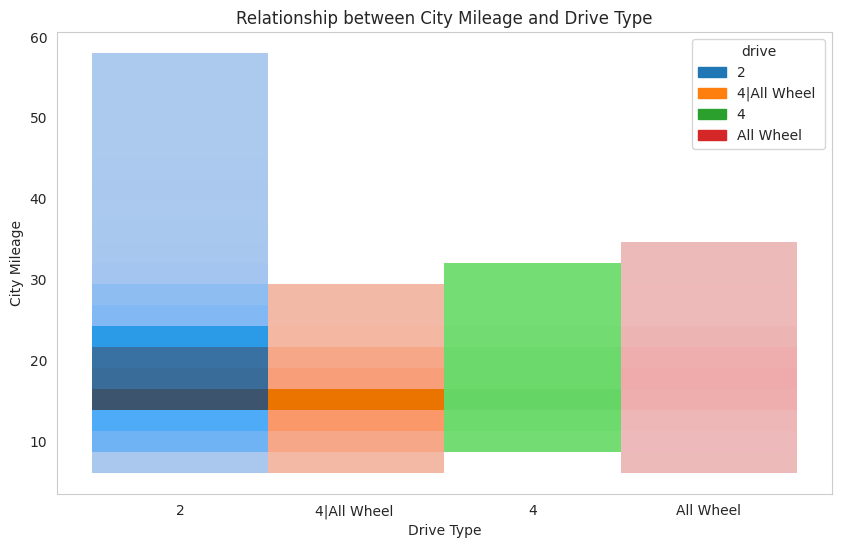

In [41]:
#visualisation 5: 2 Variable Plot - Creating histogram plot to compare relationship between city mileage and drive type.
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='drive', y='city_mpg_ft1', hue='drive', bins=20, kde=True, multiple='stack')
plt.xlabel('Drive Type')
plt.ylabel('City Mileage')
plt.title("Relationship between City Mileage and Drive Type")
plt.show()

This visualisation can provide insights into the fuel efficiency performance of vehicles with different drive types, with trade off between fuel efficiency, traction, stability, and their off-road capability. For 2 Wheel drive the histogram spans a wide range of city mileage between 6 and 58 miles/gallon which is the highest among all, it indicates that vehicle with 2 wheel drive can achieve relatively high fuel efficiency in city driving conditions. In 4/All wheel and 4 wheel drive, the histogram shows somewhat narrower range of city mileage i.e. from 6 to 30 miles/gallon which suggests
that these types of vehicle are more focused on giving better traction and stability rather than giving higher fuel efficiency. The histogram of All Wheel drive indicates that these type of vehicles offer a good balance between traction, stability and fuel efficiency in city driving conditions i.e. from 6 to 35 miles/gallon.

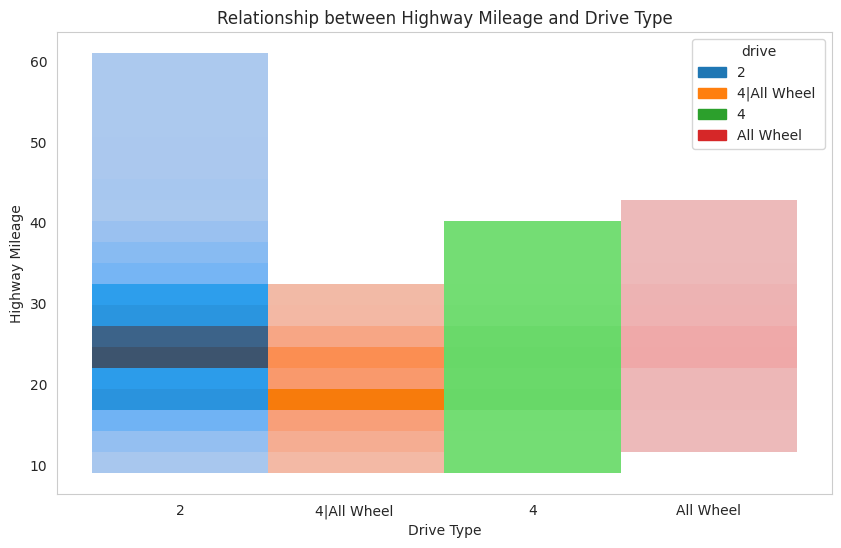

In [42]:
#visualisation 6: 2 Variable Plot - Creating box plot to compare relationship between highway mileage and drive type.
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='drive', y='highway_mpg_ft1', hue='drive', bins=20, kde=True, multiple='stack')
plt.xlabel('Drive Type')
plt.ylabel('Highway Mileage')
plt.title("Relationship between Highway Mileage and Drive Type")
plt.show()

It tells us varying fuel efficiency ranges for different drive types in highway conditions. 2-wheel drive again is the most fuel efficient among all drive types as it is benefitted from reduced friction and weight as compared to its counterparts. Vehicle with 4/All Wheel drive is considered more suitable for changing weather conditions and off road driving rather than highway mileage suggest that they have decent highway mileage ranging from 8 to 32 miles/gallon, this is maybe because of the advancements of technology and drivetrain efficiency. People buying vehicle with this type of drive type may have to compromise between highway fuel efficiency and traction/stability benefits. Surprisingly 4 and All Wheel drive type offers much better highway fuel efficiency between 8 to 42 miles/gallon than 4/All Wheel drive type which indicates that vehicles with this drive type can offer better fuel efficiency without compromising traction, stability and performance in adverse weather conditions.

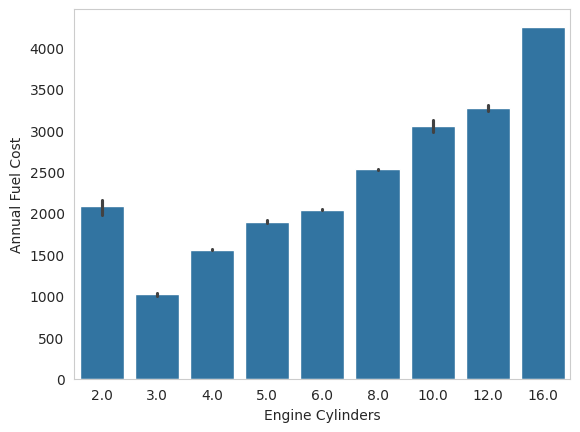

In [43]:
#visualisation 7: 2 Variable Plot - Creating box plot to compare relationship between engine cylinders and annual fuel cost
sns.barplot(data=data, x="engine_cylinders", y="annual_fuel_cost_ft1")
plt.xlabel("Engine Cylinders")
plt.ylabel("Annual Fuel Cost")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [44]:
data['engine_cylinders'].value_counts()

engine_cylinders
4.0     13607
6.0     12848
8.0      8047
5.0       723
12.0      567
3.0       207
10.0      153
2.0        49
16.0        8
Name: count, dtype: int64

As we can see, the annual fuel cost generally increases as the number of engine cylinders increases. For heavier vehicles, more cylinders are required, which increases the surface area of the piston and consumes more fuel. Engines with more cylinders generate more power, but they also consume more fuel to operate. This is because having more cylinders results in greater displacement and possibly more friction, which leads to higher fuel consumption. While more cylinders may increase fuel consumption, modern engines incorporate advanced technologies such as turbocharging, direct injection, and variable valve timing to improve fuel efficiency. There were only 49 vehicles in the dataset with 2 cylinders, representing a very small proportion of the dataset. Further analysis could be conducted to understand why the variation in annual fuel cost is high, and not consistent with the trend of increasing cylinders and increasing annual spend.

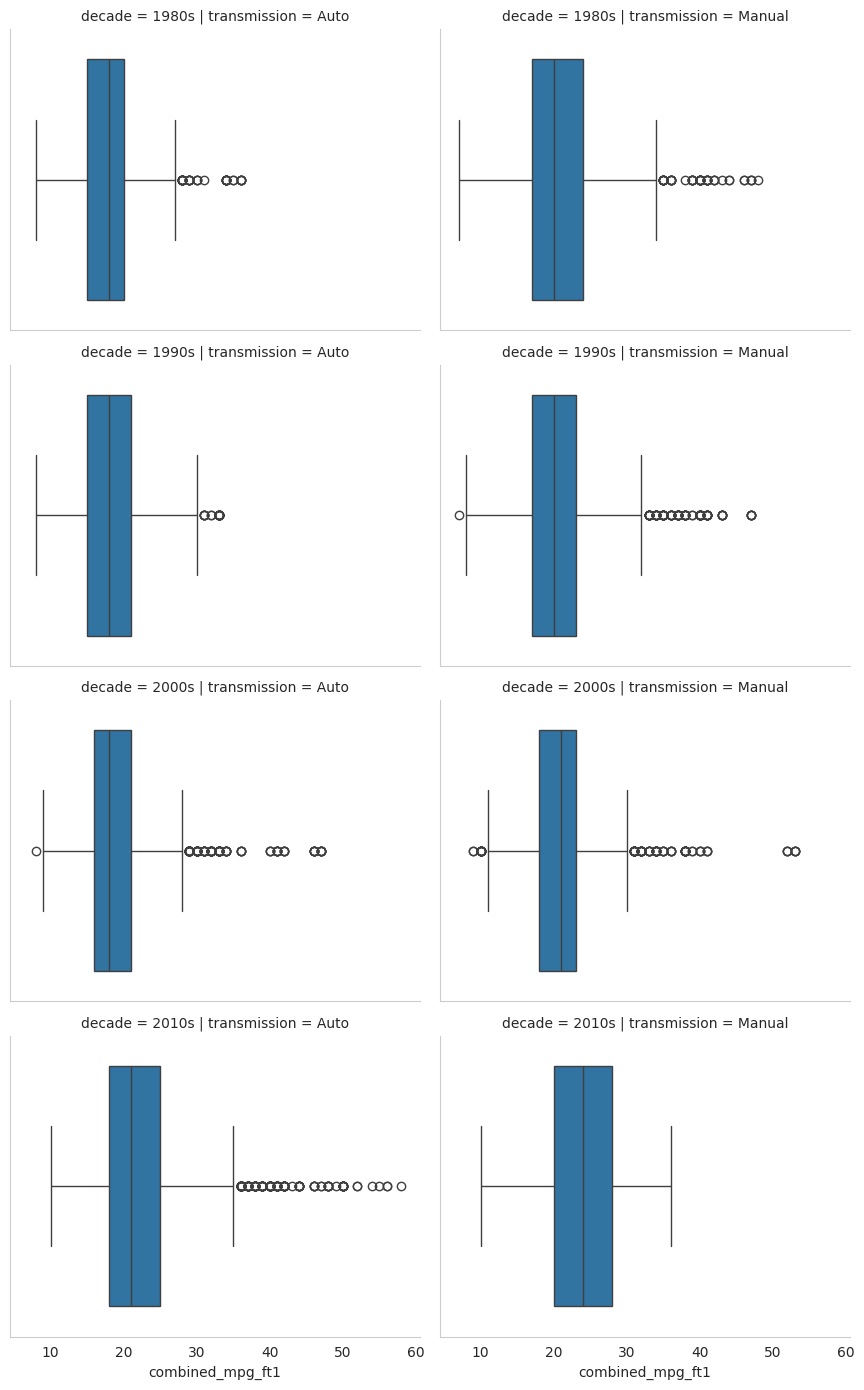

In [45]:
#visualisation 8: 3 Variable Plot - Creating box plots to show relationship between transmission, decade of production and combined miles per gallon fuel economy
g = sns.FacetGrid(data, col='transmission', row='decade', height=3.5, aspect=1.25)
g.map_dataframe(sns.boxplot, x='combined_mpg_ft1')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()


This visualisation is looking at three variables or features: transmission mode, decade of the vehicle model, and the combined miles per gallon fuel economy. There are some noteworthy observations which can be made from this visualisation. Generally, manual vehicles are less fuel efficient than automatic transmission vehicles. The mean of the combined fuel consumption in miles per gallon has increased for both types of transmission each decade despite advances in fuel technology and engine design. There are outliers for both transmission types, in most decades. Interestingly automatic vehicles have had more outliers in recent decades than the 1980s, which may relate to increasing prevalence of automatic transmission and it's use in a variety of vehicle classes. Changing consumer tastes with regards to vehicle class may also be an influential variable in this analysis.

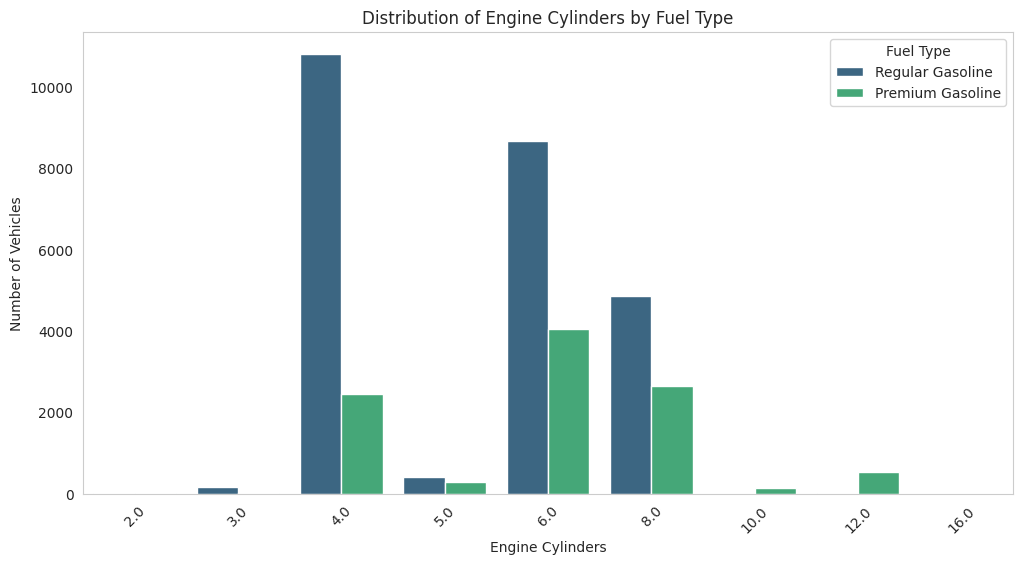

In [46]:
#visualisation 9: 2 Variable Plot - Creating bar chart to show proportion of vehicles by fuel type and engine cyclinders
# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
filtered_data = data[data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='engine_cylinders', hue='fuel_type_1', data=filtered_data,
              order=sorted(filtered_data['engine_cylinders'].unique()), palette='viridis')

# Customize plot
plt.xticks(rotation=45)
plt.title('Distribution of Engine Cylinders by Fuel Type')
plt.xlabel('Engine Cylinders')
plt.ylabel('Number of Vehicles')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.legend(title='Fuel Type', loc='best')
plt.show()

The bar chart displays the distribution of engine cylinders for vehicles using regular gasoline compared to those using premium gasoline.
The number of vehicles is categorized by the number of engine cylinders (4, 6, 8, 10, 12). For both fuel types,
4-cylinder engines are the most common, followed by 6-cylinder engines. There are considerably fewer vehicles with 8-cylinder
engines and even fewer with 10 and 12 cylinders. The chart suggests that regular gasoline is more commonly used in vehicles with fewer cylinders,
while premium gasoline is more prevalent in vehicles with a higher number of cylinders, especially for 10- and 12-cylinder engines.

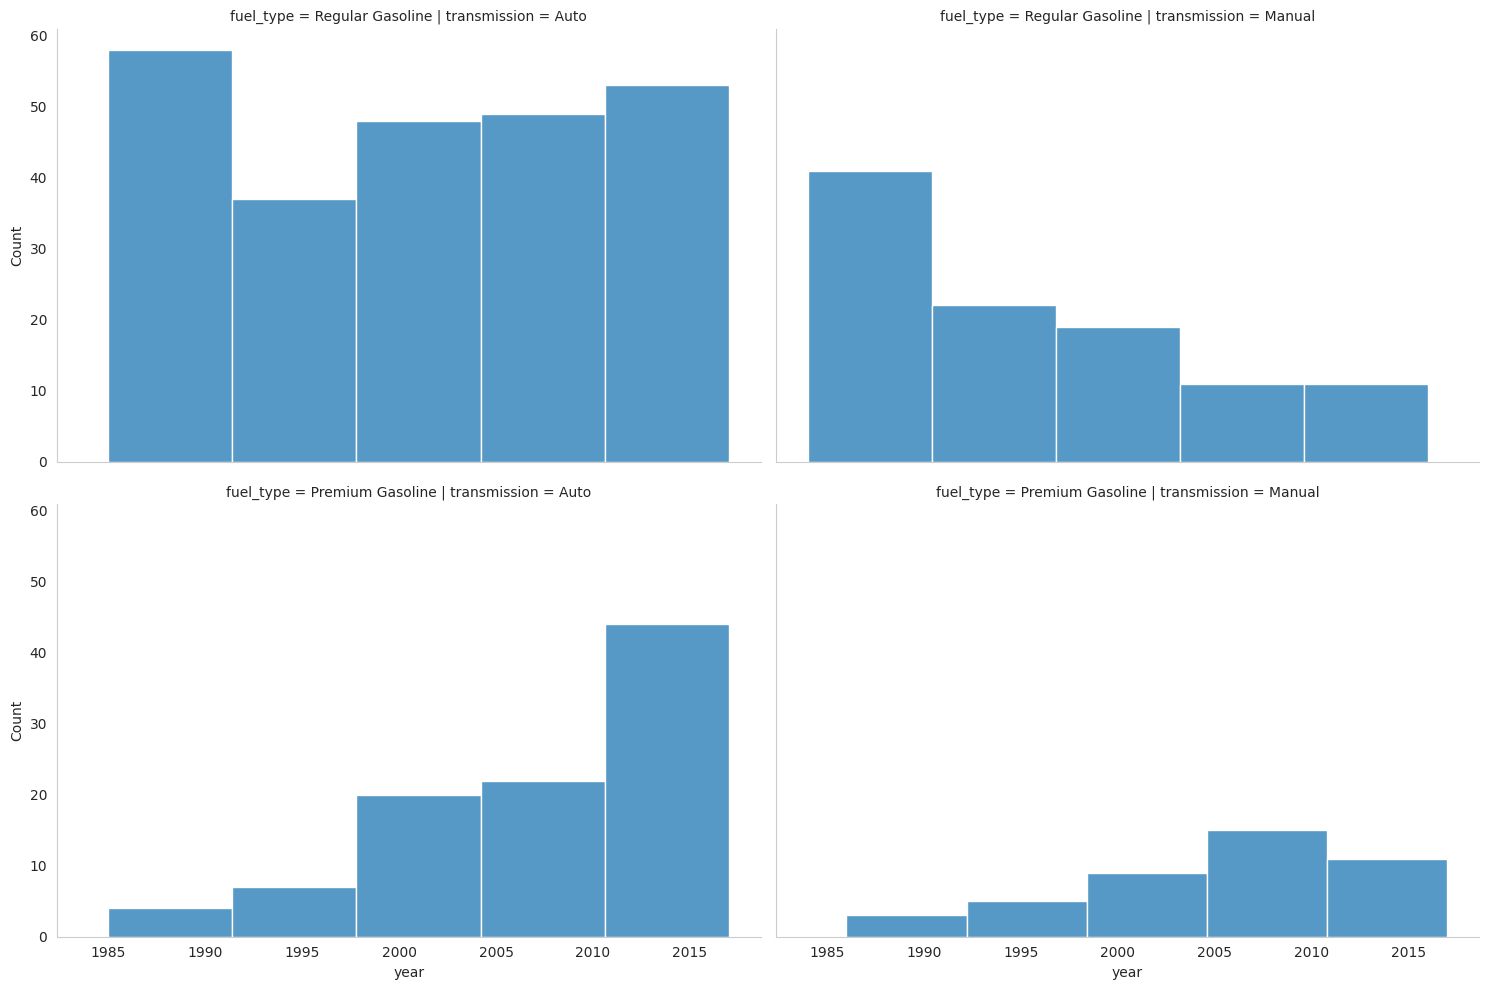

In [47]:
#visualisation 10: 3 Variable Plot - Creating histogram to show proportion of vehicles by fuel type and engine cyclinders
# Assuming your dataset contains 'year', 'fuel_type_1', and 'transmission' columns

# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
rand_data= data.sample(n = 500)
d = rand_data[rand_data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]
d = d.rename(columns={'fuel_type_1': 'fuel_type'})

# Create FacetGrid with hue
g = sns.FacetGrid(d, col='transmission', row='fuel_type', aspect=1.5, height=5)
g.map_dataframe(sns.histplot, x='year', bins=5)
sns.set_style("whitegrid", {'axes.grid' : False})
g.add_legend()

plt.show()

The graphs show the number of vehicles using regular and premium gasoline with various types of transmissions over time.
For both fuel types, the proportion of vehicles with automatic transmissions appears to be higher than that with manual transmissions.
The top left graph shows vehicles that use regular gasoline with automatic transmissions, and the count rises significantly over time, peaking around 2010.
In contrast, the top right graph depicts vehicles with manual transmissions that use regular gasoline,
and it shows a declining trend over time.
Similarly, the bottom graphs show the trends for vehicles that use premium gasoline.
Similarly, the bottom graphs show the trends for vehicles that use premium gasoline.
The bottom left graph for automatic transmissions shows an increase in the number of vehicles around the late 2000s,
whereas the bottom right graph for manual transmissions shows a modest increase around 2000 followed by a decrease.
Across all graphs, it appears that the preference for automatic transmissions has grown over time, regardless of fuel type,
while vehicles with manual transmissions have become less popular.

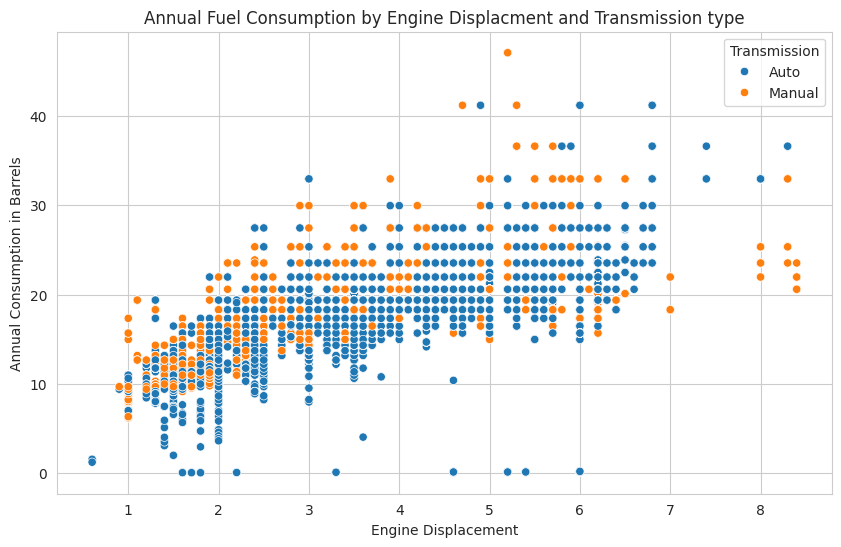

In [48]:
#Visualisation 11: 3 Variable plot - Scatterplot comparing annual fuel consumption by engine displacment and transmission type
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='engine_displacement', y='annual_consumption_in_barrels_ft1', hue='transmission')
plt.xlabel('Engine Displacement')
plt.ylabel('Annual Consumption in Barrels')
plt.title("Annual Fuel Consumption by Engine Displacment and Transmission type")
plt.legend(title='Transmission', loc='upper right')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.grid(True)
plt.show()

We can see a strong positive correlation between engine displacement and annual consumption in Barrels. As the displacement of engine increases so is the annual fuel consumption increases. The plot shows the graph for two transmission type "Auto" which is in red colour and "Manual" which is in blue colour. Values represented by transmission are continuous values. Engine displacement refers to the total volume of cylinders in engine. As engine displacement is increases, we can see a corresponding increase in annual fuel consumption. It is consistent across both transmission. Plot reveals that vehicles with larger engine displacement tends to consume more fuel annually compared to those with smaller engine displacement. This findings aligns with the understanding that larger engines typically requires more fuel to operate. Transmission type in the plot allows us to observe how this relationship varies between "Auto" and "Manual" transmissions. Notably, both transmission types exhibit a similar positive correlation between engine displacement and fuel consumption, indicating that this trend holds true for both transmission types. Understanding these relationships can inform decisions related to vehicle design, fuel efficiency optimization, and transmission selection in the automotive industry.

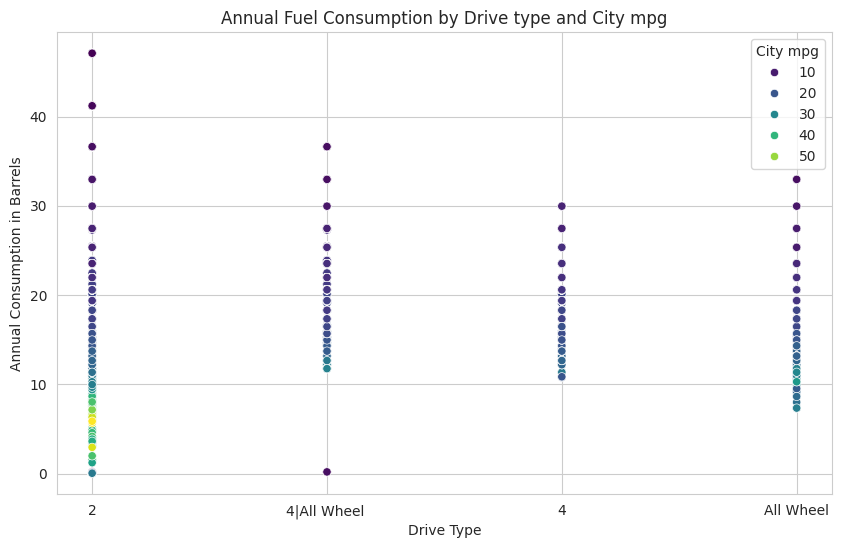

In [49]:
#Visualisation 12: 3 Variable plot - Scatterplot comparing annual fuel consumption by Drive type and City mpg
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='drive', y='annual_consumption_in_barrels_ft1', hue='city_mpg_ft1', palette='viridis')
plt.xlabel('Drive Type')
plt.ylabel('Annual Consumption in Barrels')
plt.title("Annual Fuel Consumption by Drive type and City mpg")
plt.legend(title='City mpg', loc='upper right')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.grid(True)
plt.show()

In [ ]:
 #Visualisation 13: 3 Variable plot - Scatterplot comparing annual fuel consumption by Drive type and Highway mpg
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='drive', y='annual_consumption_in_barrels_ft1', hue='highway_mpg_ft1', palette='viridis')
plt.xlabel('Drive Type')
plt.ylabel('Annual Consumption in Barrels')
plt.title("Annual Fuel Consumption by Drive type and Highway mpg")
plt.legend(title='Highway mpg', loc = 'upper right')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.grid(True)
plt.show()

## Summary & Conclusions <a id='sum'></a>

## References <a id='ref'></a>
#### Maharaj, S. (2024). *Vehicle Fuel Economy* [Data set]. Kaggle. https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy

#### Royal Automotive Club of Victoria. (2024). *AWD vs 4WD: What's the difference?*. https://www.racv.com.au/royalauto/transport/cars/difference-between-4wd-awd-suv.html

#### US Department of Energy. (2024). *FuelEconomy.gov Web Services*. https://www.fueleconomy.gov/feg/ws/#ft11